In [10]:
import pandas as pd
import pingouin as pg
import scipy.stats as st
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set(rc={'figure.figsize':(16,6)})

In [2]:
task_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-potapejko/apotapeiko/Stat/lesson_5_st/5_task_1.csv')
task_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-potapejko/apotapeiko/Stat/lesson_5_st/5_task_2.csv')

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

### 1

Подводим итоги первого теста "разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные" 
Для начала проверим, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными).

Будем использовать метод Левена. H0 - дисперсии гомогенны

In [3]:
task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
st.levene(task_1.query("group == 'A'").events, task_1.query("group == 'B'").events, task_1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [8]:
pg.homoscedasticity(task_1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


дисперсии гомогенны

Проверим нормальность данных, в том числе с помощью qq-plot

In [5]:
pg.normality(data=task_1, dv='events', group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


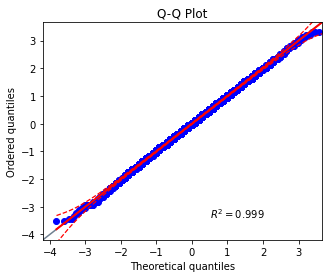

In [22]:
pg.qqplot(task_1.query("group == 'A'").events)

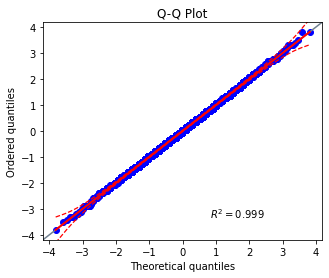

In [23]:
pg.qqplot(task_1.query("group == 'B'").events)

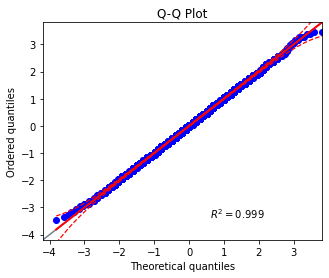

In [24]:
pg.qqplot(task_1.query("group == 'C'").events)

Распределенность во всех группах является нормальной

Проведем тест с помощью однофакторного анализа

In [6]:
st.f_oneway(task_1.query("group == 'A'").events, task_1.query("group == 'B'").events, task_1.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Различия между группами есть, проверим между какими именно группами с помощью критерия Тьюки разными библиотеками

In [8]:
pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [9]:
pg.pairwise_tukey(dv='events', between='group', data=task_1)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


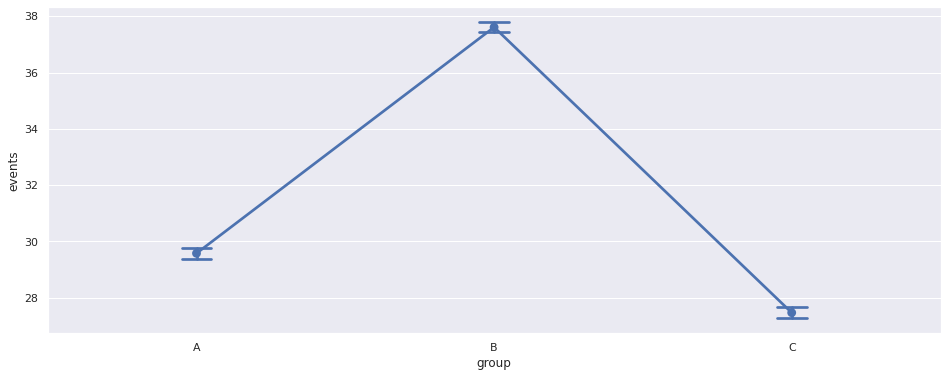

In [28]:
sns.pointplot(x='group', y='events', data=task_1, capsize= .1)

Между всеми 3мя группами есть статистически значимые различия. по итогу группа B показала себя лучше всего. Будем использовать квадратные креативы из этой группы

### 2

Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента. Будем использовать многофакторный дисперсионный анализ

Посмотрим на данные. Для начала визуализируем распределение events для контрольной и тестовой групп

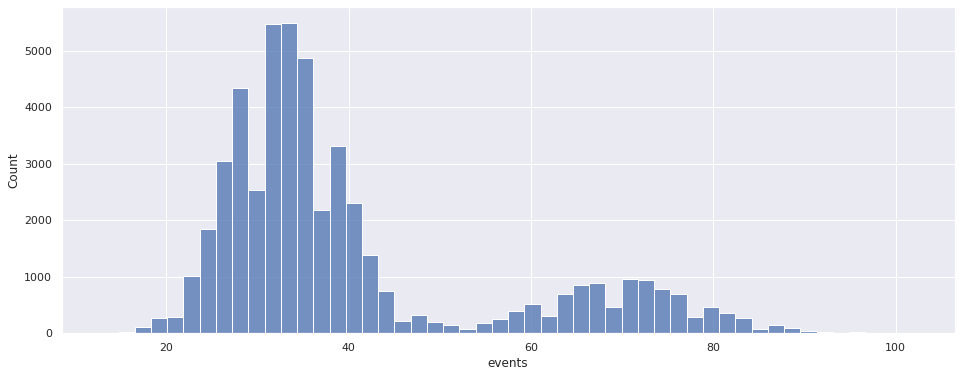

In [3]:
sns.histplot(task_2.query("group == 'test'").events, bins=50)

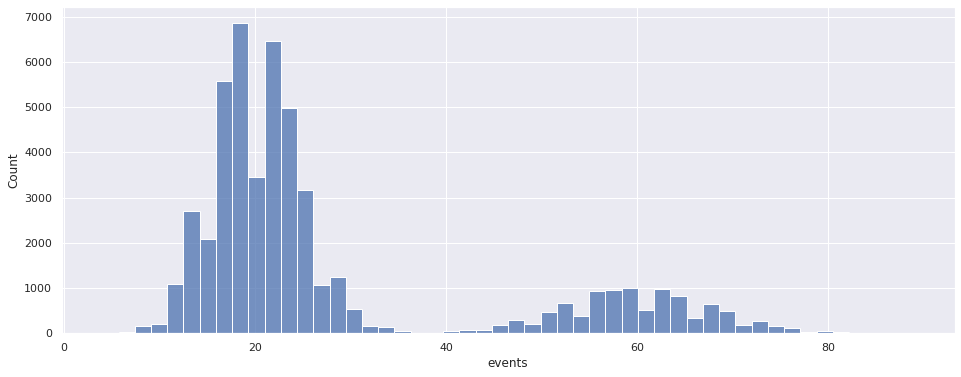

In [4]:
sns.histplot(task_2.query("group == 'control'").events, bins=50)

Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя.

In [11]:
task_2 \
    .groupby(['group', 'segment'], as_index=False).agg({'events': ['mean', 'median', 'std']}).round(2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

Формируем ДФ для анализа

In [11]:
task_2['combination'] = task_2['group'] + '\\' + task_2['segment']

In [12]:
task_2

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high
...,...,...,...,...,...
99995,60695,control,low,15.0,control\low
99996,5934,control,low,16.0,control\low
99997,30046,control,low,22.0,control\low
99998,26474,control,low,21.0,control\low


Проведем тест через pg.anova, а затем используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [15]:
pg.anova(data=task_2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


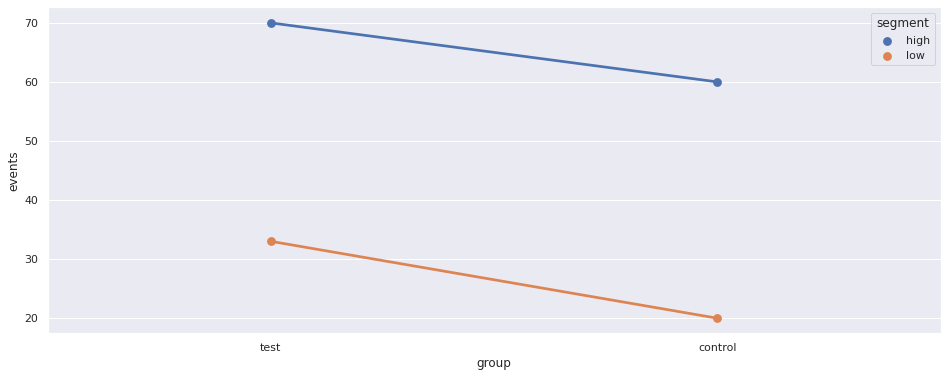

In [17]:
sns.pointplot(x= 'group', y='events', hue='segment', data=task_2)

In [19]:
pg.pairwise_tukey(dv='events', between='combination', data=task_2)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control\high,control\low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control\high,test\high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control\high,test\low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control\low,test\high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control\low,test\low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test\high,test\low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

Визуализируем результаты теста

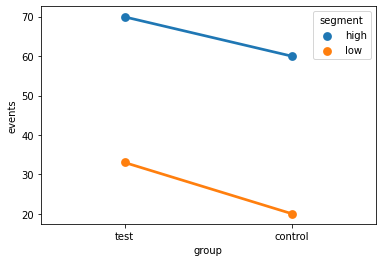

In [19]:
sns.pointplot(x='group', y='events', hue='segment', data=task_2)

In [ ]:
Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. Судя по графику, для всех групп среднее значение events 
увеличилось, поэтому решение: выкатываем новую версию. 